25.141951322555542


Text(0, 0.5, "Titan's eccentricity")

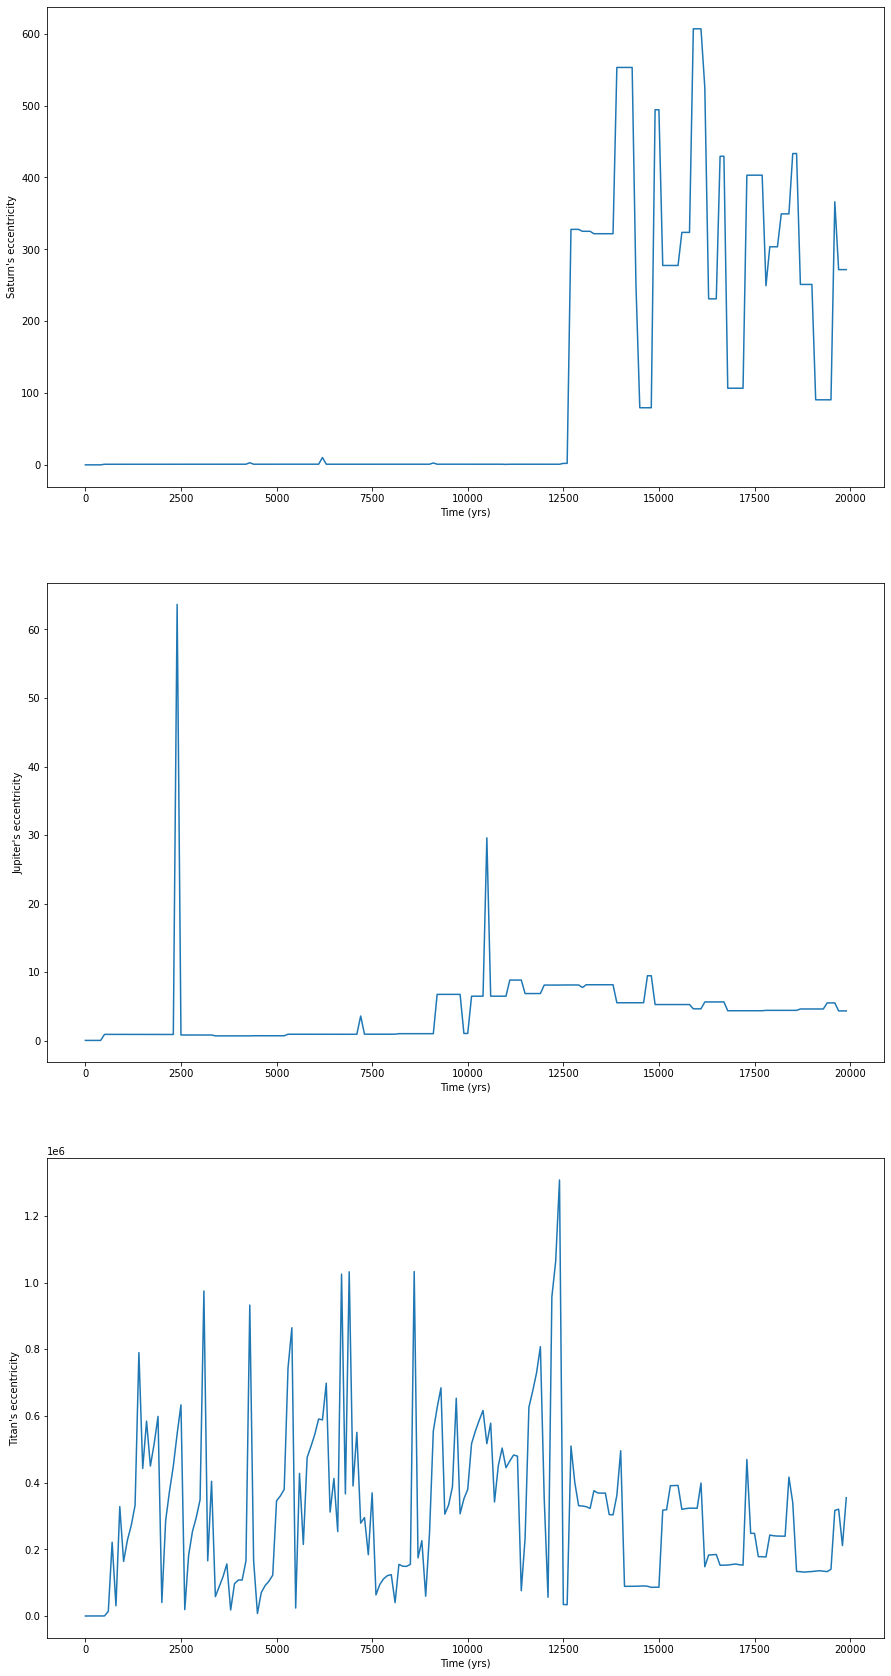

In [21]:
import rebound
import numpy as np
import matplotlib.pyplot as plt
import time

# Global Constants
G = 6.67e-11 # G in SI units ****
M_SUN = 1.9891e30 # mass of sun in kg ****
AU_TO_M = 1.496e+11 # meters in one AU
YR_TO_SEC = 365.25*24.*3600. # seconds in a year

# Check accuracy of all the following constants
mSat = 0.0002857 # mass of saturn in solar masses
aSat = 9.5549 # semi-major axis of Saturn's orbit in AU
eSat = 0.0565 # eccentricity of Saturn
oSat = 26.7 * np.pi / 180. # obliquity
mJup = (1.898e+27)/M_SUN
aJup = (778.570e+9)/AU_TO_M
eJup = 0.0489
mTitan = 0.0000000676319759 # mass of titan in solar masses
eTitan = 0.001 # eccentricity of Titan's orbit ***** Modify as needed *****
aTitan = 0.00038926024*8.2

start = time.time()

sim = rebound.Simulation()
sim.units = ('AU', 'yr', 'MSun')
sim.integrator = "janus"

"""sim.add(m=1., hash='Sun')
sim.add(rebound.Particle(sim, primary=sim.particles['Sun'], m=mJup, a=aJup, e=eJup, hash='Jupiter'))
sim.add(rebound.Particle(sim, primary=sim.particles['Sun'], m=mSat, a=aSat, e=eSat, hash='Saturn'))
sim.add(rebound.Particle(sim, primary=sim.particles['Saturn'], m=mTitan, a=aTitan, e=eTitan, hash='Titan'))

"""
sim.add(m=mSat, hash='Saturn')
sim.add(rebound.Particle(sim, primary=sim.particles['Saturn'], m=mTitan, a=aTitan, e=eTitan, hash='Titan'))
sim.add(rebound.Particle(sim, primary=sim.particles['Saturn'], m=1., a=aSat, e=eSat, inc=oSat, hash='Sun'))
sim.add(rebound.Particle(sim, primary=sim.particles['Sun'], m=mJup, a=aJup, e=eJup, hash='Jupiter'))


numSamples = 200
eS_array = [0] * numSamples
eJ_array = [0] * numSamples
eT_array = [0] * numSamples
t_array = [0] * numSamples
for i in range(numSamples):
    sim.integrate(100.*i)
    sim.move_to_hel()
    eT_array[i] = sim.particles['Titan'].calculate_orbit(primary=sim.particles['Saturn']).e
    sim.move_to_hel()
    eS_array[i] = sim.particles['Sun'].calculate_orbit(primary=sim.particles['Saturn']).e
    sim.move_to_hel()
    eJ_array[i] = sim.particles['Jupiter'].calculate_orbit(primary=sim.particles['Sun']).e
    sim.move_to_hel()
    t_array[i] = sim.t

end = time.time()
print(end-start)
    
fig, axs = plt.subplots(3)

fig.set_size_inches(15, 30)

axs[0].plot(t_array,eS_array)
axs[0].set_xlabel('Time (yrs)')
axs[0].set_ylabel("Saturn's eccentricity")

axs[1].plot(t_array,eJ_array)
axs[1].set_xlabel("Time (yrs)")
axs[1].set_ylabel("Jupiter's eccentricity")

axs[2].plot(t_array,eT_array)
axs[2].set_xlabel("Time (yrs)")
axs[2].set_ylabel("Titan's eccentricity")